# Task 1 : Animate Bivariate Normal Distribution

Problem: 


1. Reproduce the figure showing samples from bivariate normal with marginal PDFs from scratch using JAX and matplotlib.

2. Add interactivity to the figure by adding sliders with ipywidgets. You should be able to vary the parameters of bivariate normal distribution (mean and covariance matrix) using ipywidgets.






## Importing Important Libraries

In [6]:
import numpy as np
import jax.numpy as jnp
from jax import random
from jax.scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
key = random.PRNGKey(29)

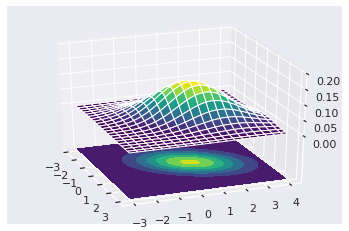

In [9]:
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)
mu = jnp.array([0., 1.])
Sigma = jnp.array([[ 1. , 0.6], [0.6,  2]])
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):


    n = mu.shape[0]
    Sigma_det = jnp.linalg.det(Sigma)
    Sigma_inv = jnp.linalg.inv(Sigma)
    N = jnp.sqrt((2*np.pi)**n * Sigma_det)

    fac = jnp.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return jnp.exp(-fac / 2) / N

Z = multivariate_gaussian(pos, mu, Sigma)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                 cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

ax.set_zlim(-0.15,0.2)
ax.set_zticks(jnp.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()